In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [13]:
file_path = "../results/mash_out_k12_size2048.txt"
df = pd.read_csv(file_path, sep='\t', comment='#', header=None, index_col=None)
df.columns = ["seq1", "seq2", "dist", "p", "matching_hashes"]
df
distance_matrix = df.pivot(index='seq1', columns='seq2', values='dist')
distance_matrix

seq2,data/DNA_seq/Airn_M_rep.fa,data/DNA_seq/Gm13261_M_act.fa,data/DNA_seq/Gm16084_M_act.fa,data/DNA_seq/Halr1_M_rep.fa,data/DNA_seq/Hottip_M_act.fa,data/DNA_seq/Kcnq1ot1_M_rep.fa,data/DNA_seq/Morrbid_M_rep.fa,data/DNA_seq/Nespas_M_rep.fa,data/DNA_seq/Tsix_M_rep.fa,data/DNA_seq/Ube3a_M_rep.fa,data/DNA_seq/XistAR_M_act.fa,data/DNA_seq/Xist_M_rep.fa
seq1,,,,,,,,,,,,
data/DNA_seq/Airn_M_rep.fa,0.000000,1.000000,0.577663,0.371034,0.577663,0.240195,0.519942,1.000000,0.462261,0.252020,0.519942,0.371034
data/DNA_seq/Gm13261_M_act.fa,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.577663,0.577663,1.000000,0.577663
data/DNA_seq/Gm16084_M_act.fa,0.577663,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.577663,1.000000,1.000000,1.000000,1.000000
data/DNA_seq/Halr1_M_rep.fa,0.371034,1.000000,1.000000,0.000000,0.577663,0.415748,0.486194,0.577663,0.428553,0.337488,0.519942,0.404661
data/DNA_seq/Hottip_M_act.fa,0.577663,1.000000,1.000000,0.577663,0.000000,0.519942,0.577663,1.000000,0.519942,0.577663,0.486194,0.519942
data/DNA_seq/Kcnq1ot1_M_rep.fa,0.240195,1.000000,1.000000,0.415748,0.519942,0.000000,0.443706,1.000000,0.577663,0.232361,0.462261,0.347222
data/DNA_seq/Morrbid_M_rep.fa,0.519942,1.000000,1.000000,0.486194,0.577663,0.443706,0.000000,0.486194,0.486194,0.462261,0.462261,0.519942
data/DNA_seq/Nespas_M_rep.fa,1.000000,1.000000,0.577663,0.577663,1.000000,1.000000,0.486194,0.000000,0.577663,1.000000,1.000000,0.519942
data/DNA_seq/Tsix_M_rep.fa,0.462261,0.577663,1.000000,0.428553,0.519942,0.577663,0.486194,0.577663,0.000000,0.486194,0.050908,0.135302


In [30]:
def vis_dist_mtx_mash(file_path, k=8, size=1024):
    df = pd.read_csv(file_path, sep='\t', comment='#', header=None, index_col=None)
    df.columns = ["seq1", "seq2", "dist", "p", "matching_hashes"]
    distance_matrix = df.pivot(index='seq1', columns='seq2', values='dist')
    df = distance_matrix
    df.index = [os.path.basename(file_name) for file_name in df.index]
    df.columns = df.index
    df = 1 - df
    for i in range(len(df)):
        for j in range(i):
            df.iloc[i, j] = df.iloc[j, i]
    df.replace('-', 1, inplace=True)
    df = df.astype(float)
    plt.figure(figsize=(10, 8))
    sns.clustermap(df, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Mash Pairwise Similarity Heatmap K = ' + str(k) + " Sketchsize = " + str(size))
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    # plt.tight_layout()
    plt.show()

<Figure size 1000x800 with 0 Axes>

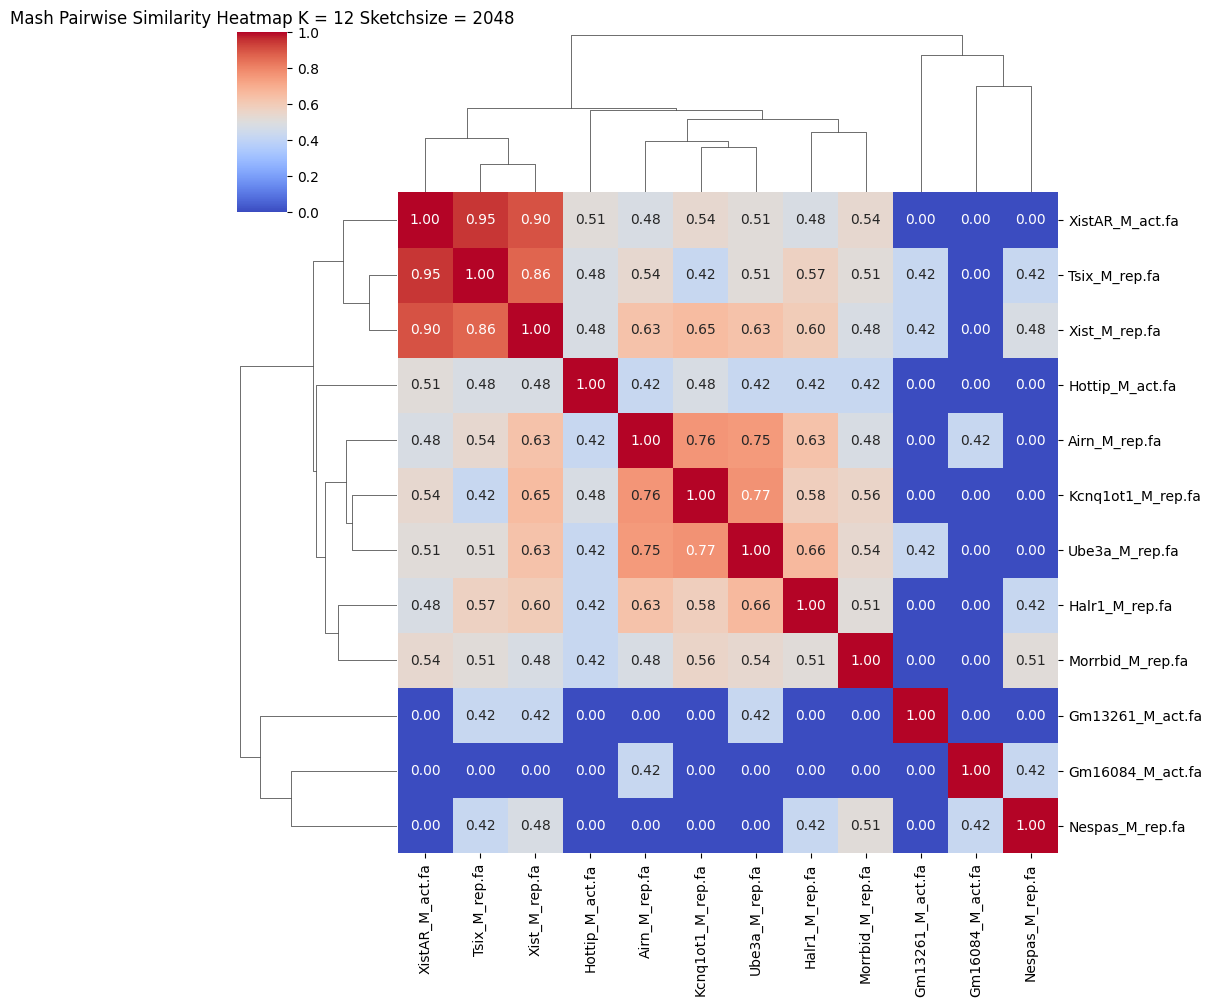

In [46]:
vis_dist_mtx_mash("../results/mash_out_k12_size2048.txt", k=12, size=2048)

<Figure size 1000x800 with 0 Axes>

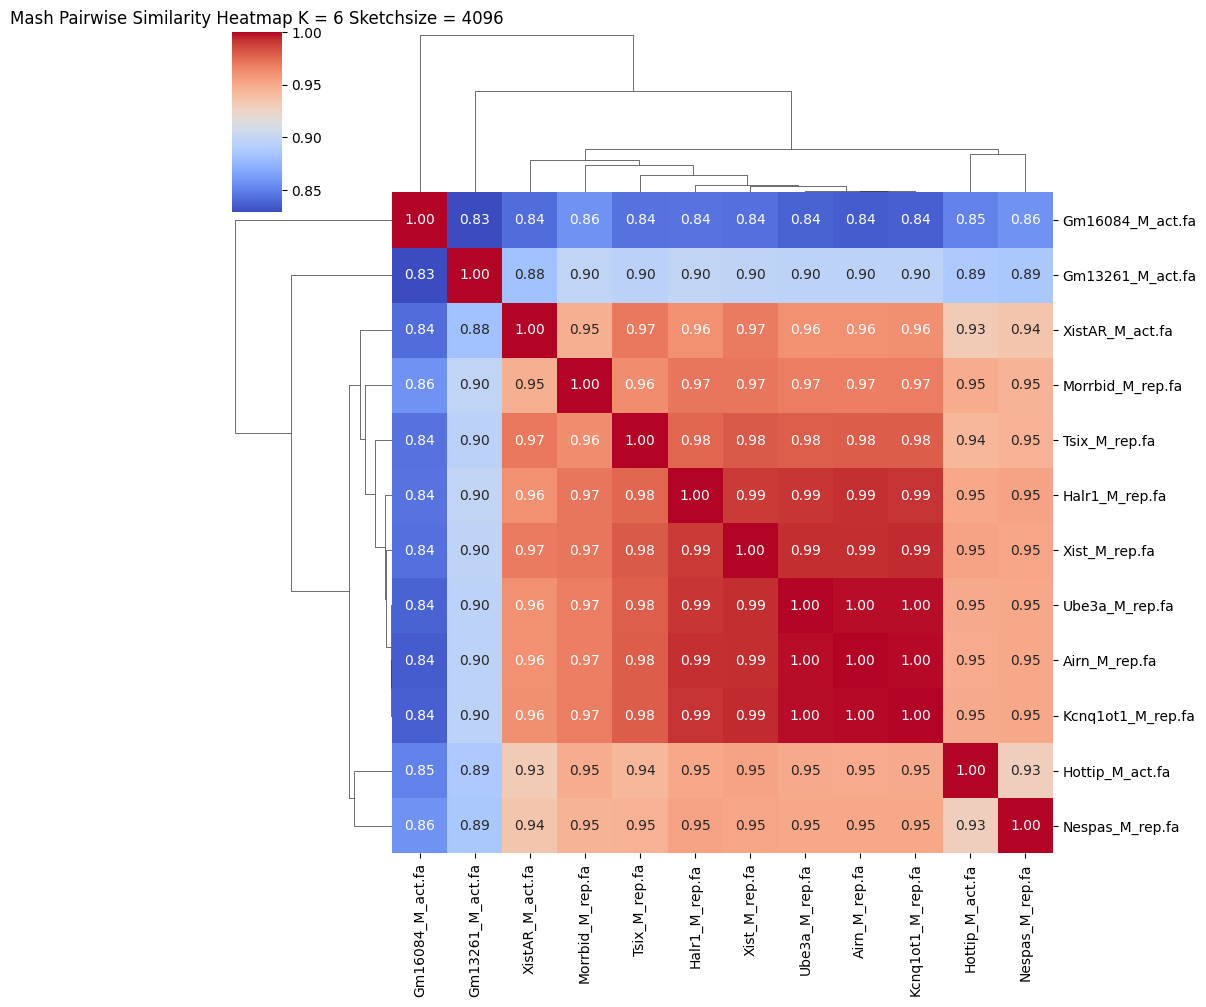

In [31]:
vis_dist_mtx_mash("../results/mash_out_k6_size8192.txt", k=, size=4096)

In [48]:
[os.path.basename(file_name) for file_name in distance_matrix.index]

['Airn_M_rep.fa',
 'Gm13261_M_act.fa',
 'Gm16084_M_act.fa',
 'Halr1_M_rep.fa',
 'Hottip_M_act.fa',
 'Kcnq1ot1_M_rep.fa',
 'Morrbid_M_rep.fa',
 'Nespas_M_rep.fa',
 'Tsix_M_rep.fa',
 'Ube3a_M_rep.fa',
 'XistAR_M_act.fa',
 'Xist_M_rep.fa']